# Project: Furniture Price Prediction  (Jumia)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Preprocessing</a></li>
<li><a href="#conclusions">Modelling</a></li>
<li><a href="#conclusions">Evaluation</a></li>
<li><a href="#conclusions">Conclusion</a></li>
    

</ul>

<a id='intro'></a>
## Introduction

The dataset contains detailed information
about various types of furniture and information
about furniture prices sold
on Jumia.com

# About this dataset 📭
This dataset contains 2000 rows of listings for data analyst and machine learning positions, with features such as:

● Furniture: it has the furniture name

● Type: it has the type of furniture

● Url: it has the link to the furniture page

● Rate: it has the rate of furniture
     (note ==> 0 means that the furniture is not rated)
  
● Delivery: it has the price of delivery to a house

● Sale: it has the percentage of discounts on furniture

● Price: it has the price of furniture

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error





<a id='wrangling'></a>
## Data Wrangling

In this step we will load the data , assess the dataset and clean it to be ready for analysis . 

### General look

In [3]:
# Loading the data 
data=pd.read_csv('Furniture Price Prediction.csv')
df=data.copy()
df.head()

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0


In [4]:
df.tail()

,furniture,type,url,rate,delivery,sale,price
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0
1999,Comfy memory foam mattress,CIREM,https://www.jumia.com.eg//ar/cirem-comfy-medic...,0.0,172.14,10%,10775.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


In [7]:
df.shape

(2000, 7)

In [8]:
df.isnull().sum()

furniture     0
type          0
url           0
rate          0
delivery      0
sale          0
price        39
dtype: int64

The data has 39 null values in "price" column 

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

furniture    0
type         0
url          0
rate         0
delivery     0
sale         0
price        0
dtype: int64

The data now has no null values 

In [11]:
df.shape

(1961, 7)

In [12]:
df.drop(['url'],axis=1,inplace=True)
df.shape

(1961, 6)

# Descriptive Statistics

In [13]:
df.describe()

,rate,delivery,price
count,1961.000000,1961.000000,1961.000000
mean,0.749567,141.282963,2910.418195
std,1.618916,137.392050,4002.917206
min,0.000000,10.830000,13.400000
25%,0.000000,52.440000,740.000000
50%,0.000000,172.140000,1900.000000
75%,0.000000,172.140000,4000.000000
max,5.000000,2409.900000,55000.000000


## Data Preprocessing
So, basically there are lot of unique variables for names and types of furniture. As I suggested, they are not fit for Label Encoder. Hence, I decided to leave these features behind

The only features I find fit enough for training models are:

rate
delivery
sale
However, sale and rate features need additional pre-processing. We need to remove "%" sign from sale featuer
and replce the retes of zeroes with the average rate

In [14]:
rate_col = df[df.rate != 0]
avg_rate = rate_col["rate"].mean()
df["rate"] = df["rate"].replace([0], avg_rate)

In [15]:
df['sale']=df['sale'].str.replace('%','')
df['sale']=df['sale'].astype(int)
df['sale'].dtype

dtype('int32')

In [16]:
# selecting the most important features
df = df[['rate', 'delivery', 'sale', 'price']]

## Modelling

In [17]:
#Splitting the Features and Target
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
#Splitting the Data into Training data & Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [19]:
print(x.shape, x_train.shape, x_test.shape)

(1961, 3) (1568, 3) (393, 3)


In [20]:
print(y.shape, y_train.shape, y_test.shape)

(1961,) (1568,) (393,)


In [21]:
def model_evaluate(model, name, plot=True):
    y_pred = model.predict(x_test)
    tit = name + "\nMAE:{}\nMSE:{}".format(mean_absolute_error(y_pred, y_test), mean_squared_error(y_pred, y_test))
    print(tit)

In [22]:
def model_train(model, name):
    model.fit(x_train, y_train)
    model_evaluate(model, name, False)
    return model

## Evaluation

In [23]:
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=150, max_depth=60)
svr = SVR(kernel='linear', C=0.6)
abr = AdaBoostRegressor(n_estimators=45, learning_rate=0.3)
knr = KNeighborsRegressor(n_neighbors=10)
models = [lr, rfr, svr, abr, knr]
names = ['Linear Regression', 'Random Forest Regressor', 'Support Vector Regression',
        'Ada Boost Regressor', 'KNeighbors Regressor']

In [24]:
mls = []
for i, j in zip(models, names):
    mls.append(model_train(i, j))
    print()

Linear Regression
MAE:2270.5836028215085
MSE:16818537.32002697

Random Forest Regressor
MAE:1805.291061519253
MSE:13963891.708192393

Support Vector Regression
MAE:2144.6867278213886
MSE:17397965.331989214

Ada Boost Regressor
MAE:2509.2483683737505
MSE:18350626.578109298

KNeighbors Regressor
MAE:2030.0459033078882
MSE:15175795.151673162



### Evaluate trained models

I used Mean Absolute Error(MAE)

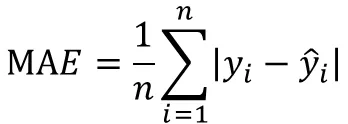

and Mean Squared Error(MSE)

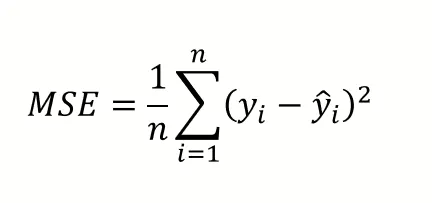

Where:

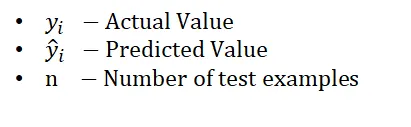


## Conclusion

 The best and most consistent models used are:
 
 Random Forest Regressor max_depth = 60 and n_estimators = 150
 
 and KNeighborsRegressor with K=10